<img src="./logo_UTN_3.svg" align="right" width="200" /> 

### Teoría de los Circuitos 2

# Trabajo semanal 7
### Axel Nathanel Nahum


## Introduccion

En este $Jupyter$ nos encontraremos con la resolucion de los $ejercicios$ de la $TS7$. 


## Enunciados

### Enunciado ejericico 1

<img src="./Ejercicio_1.png" align="middle" width="800" /> 

### Enunciado ejericico 2

### a)

<img src="./Ejercicio_2a.png" align="middle" width="800" /> 

### b)

<img src="./Ejercicio_2b.png" align="middle" width="800" /> 

### Enunciado ejericico 3

1) Se dispone del siguiente filtro digital:

<img src="./Ejercicio3.png" align="middle" width="300" /> 

$a)$ Para la transferencia del filtro con $M$ $=$ $2$ y $α$ $=$ $0.8$; calcular 1) el diagrama de polos y ceros y la respuesta en frecuencia de 2) módulo, 3) fase y 4) retardo de grupo.

$b)$ Si quisiéramos anular una senoidal interferente de $125$ $Hz$ y su segunda armónica, y sólo dispone de un sumador y el filtro de la figura con $M$ $=$ $4$. Proponga un esquema de la solución y calcule los parámetros del filtro que sería necesario adecuar.

## Resolucion

### Resolucion ejercicio 1

In [27]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ1_.pdf", width=1000, height=1000)

### Resolucion ejercicio 2

In [28]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ2.pdf", width=900, height=1000)

### Resolucion ejercicio 3

In [29]:
from IPython.display import IFrame
IFrame("./Resolucion_EJ3.pdf", width=900, height=1000)

## Codigo de PYTHON EJ2 

In [30]:
import numpy as np
import scipy.signal as sig
import matplotlib as mpl
import matplotlib.pyplot as plt
import sympy as sp

from pytc2.sistemas_lineales import plot_plantilla, analyze_sys

mpl.rcParams['figure.figsize'] = (10,10)

In [31]:
#%% Resolución simbólica

s, z = sp.symbols('s z', complex=True)
k, fs, Q, Om, Wo = sp.symbols('k fs Q Om Wo', real=True, positive=True)

Ts = 1/(s**2+s/Q+1)
fz = k * (z-1)/(z+1)

Tz = sp.collect(sp.simplify(sp.expand(Ts.subs(s, fz))), z)

display(Ts)
display(Tz)
# display(Tz.subs(k, 2*fs))

1/(s**2 + 1 + s/Q)

Q*(z**2 + 2*z + 1)/(Q*k**2 + Q - k + z**2*(Q*k**2 + Q + k) + z*(-2*Q*k**2 + 2*Q))

## Codigo asociado al punto a) (Fs = 100KHz)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

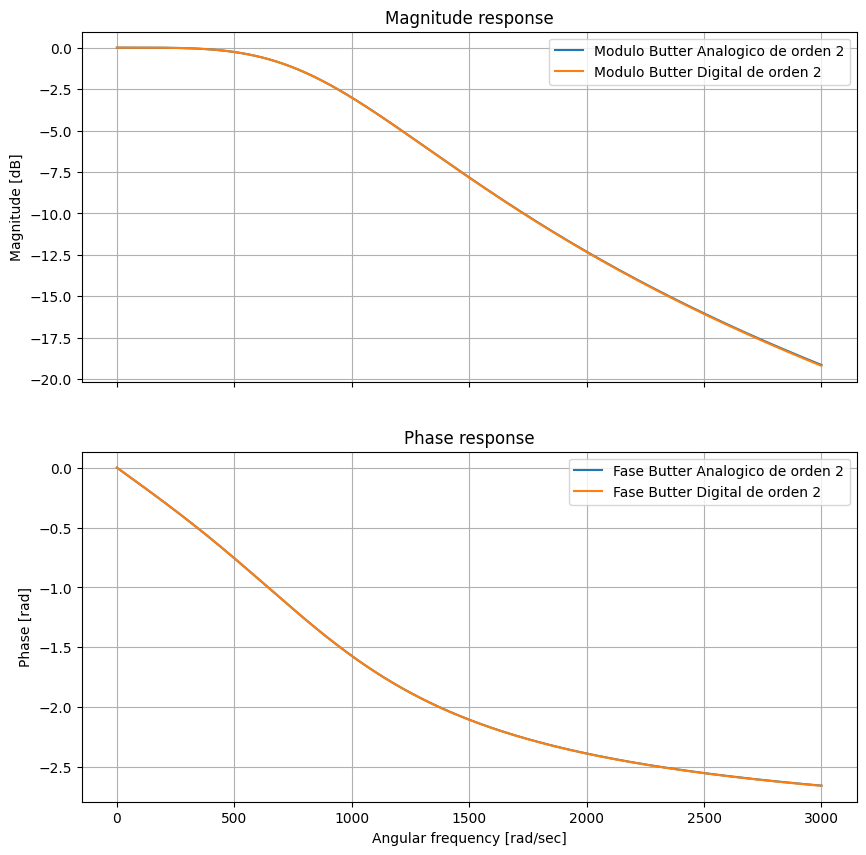

In [33]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2

plt.close("all")

# Genero el filtro Butter analogico

n_orden = 2
fc = 1000
norma_fc = 1
fc_norm = fc/norma_fc

w0 = 2*np.pi*fc_norm

fs = 100e3

ripple = 3
eps = np.sqrt(10**(ripple/10)-1)

#z,p,k = sig.buttap(n_orden)
# Desnormalizamos para cumplir con el ripple
#z, p, k = sig.lp2lp_zpk(z, p, k, wo=w0*eps**(-1/n_orden) )
#num_butt, den_butt = sig.zpk2tf(z,p,k)

#Z,P,K = sig.buttap(2)
#Num,Den = sig.zpk2tf(Z,P,K)
#num_butt,den_butt = sig.lp2lp(Num,Den, w0*eps**(-1/n_orden))

num_butt, den_butt = sig.butter(2, fc_norm, btype="low", analog=True)

tf_analog_butter = sig.TransferFunction(num_butt, den_butt)
tc2.pretty_print_lti(num_butt, den_butt)

#### Butter Digital

# Parametros

k = 2*fs
Q = 1/np.sqrt(2)

# Filtro (Esto hayado en el PDF)

#num_tz, den_tz = sig.bilinear(num_butt, den_butt, fs = 1.0)

num_tz = [w0**2, 2 * w0**2, w0**2]
den_tz = [k**2+(k*w0/Q)+w0**2, (2*w0**2)-(2*k**2), k**2-(k*w0/Q)+w0**2]

tf_digital_butter = sig.TransferFunction(num_tz, den_tz)

tc2.pretty_print_lti(num_tz, den_tz)

########################################################################

freq = np.linspace(0, 3e3, 1000)

w_an, h_an = sig.freqs(num_butt, den_butt, worN = freq)
mod_an = np.abs(h_an)
phase_an = np.angle(h_an)

freq = np.linspace(0, 3e3, 1000)

w_dig, h_dig = sig.freqz(num_tz, den_tz, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

fig_bode = plt.figure(1)

ax_mod, ax_phase = fig_bode.subplots(2, 1, sharex=True)
fig_bode.sca(ax_mod)
ax_mod.plot(w_an, 20*np.log10(mod_an), label='Modulo Butter Analogico de orden 2')
ax_mod.plot(w_dig, 20*np.log10(mod_dig), label='Modulo Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.title('Magnitude response')

fig_bode.sca(ax_phase)
ax_phase.plot(w_an, phase_an, label='Fase Butter Analogico de orden 2')
ax_phase.plot(w_dig, phase_dig, label='Fase Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase [rad]')
plt.title('Phase response')

plt.show()

### Codigo asociado al punto b) (Fs = 10KHz)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

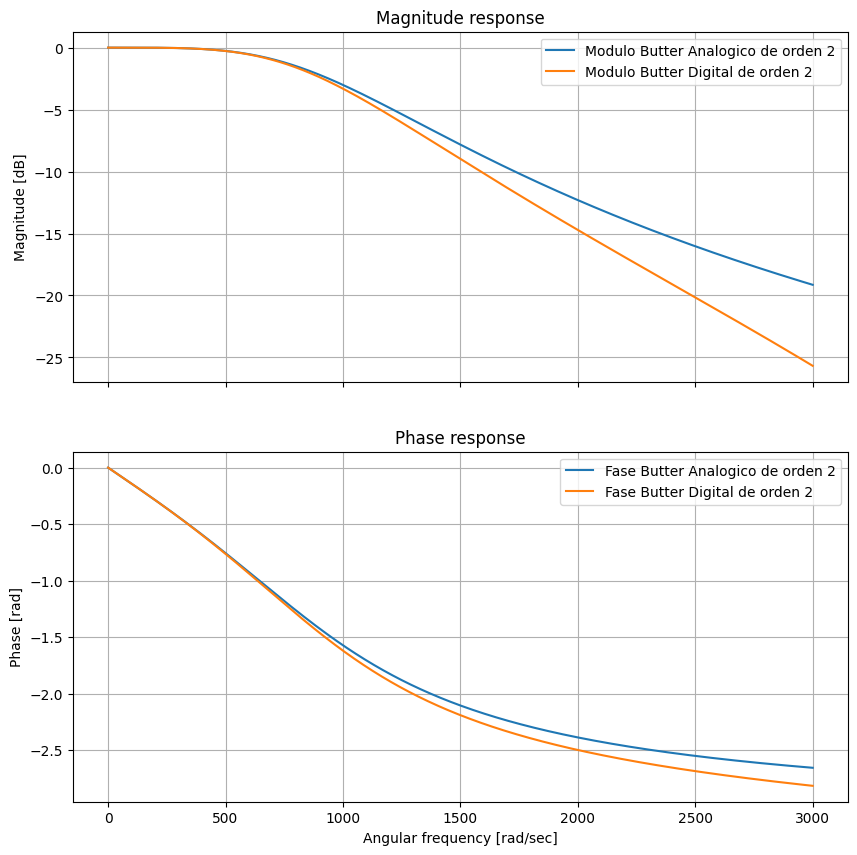

In [34]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2

plt.close("all")

# Genero el filtro Butter analogico

n_orden = 2
fc = 1000
norma_fc = 1
fc_norm = fc/norma_fc

w0 = 2*np.pi*fc_norm

fs = 10e3

ripple = 3
eps = np.sqrt(10**(ripple/10)-1)

#z,p,k = sig.buttap(n_orden)
# Desnormalizamos para cumplir con el ripple
#z, p, k = sig.lp2lp_zpk(z, p, k, wo=w0*eps**(-1/n_orden) )
#num_butt, den_butt = sig.zpk2tf(z,p,k)

#Z,P,K = sig.buttap(2)
#Num,Den = sig.zpk2tf(Z,P,K)
#num_butt,den_butt = sig.lp2lp(Num,Den, w0*eps**(-1/n_orden))

num_butt, den_butt = sig.butter(2, fc_norm, btype="low", analog=True)

tf_analog_butter = sig.TransferFunction(num_butt, den_butt)
tc2.pretty_print_lti(num_butt, den_butt)

#### Butter Digital

# Parametros

k = 2*fs
Q = 1/np.sqrt(2)

# Filtro (Esto hayado en el PDF)

#num_tz, den_tz = sig.bilinear(num_butt, den_butt, fs = 1.0)

num_tz = [w0**2, 2 * w0**2, w0**2]
den_tz = [k**2+(k*w0/Q)+w0**2, (2*w0**2)-(2*k**2), k**2-(k*w0/Q)+w0**2]

tf_digital_butter = sig.TransferFunction(num_tz, den_tz)

tc2.pretty_print_lti(num_tz, den_tz)

########################################################################

freq = np.linspace(0, 3e3, 1000)

w_an, h_an = sig.freqs(num_butt, den_butt, worN = freq)
mod_an = np.abs(h_an)
phase_an = np.angle(h_an)

w_dig, h_dig = sig.freqz(num_tz, den_tz, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

fig_bode = plt.figure(1)

ax_mod, ax_phase = fig_bode.subplots(2, 1, sharex=True)
fig_bode.sca(ax_mod)
ax_mod.plot(w_an, 20*np.log10(mod_an), label='Modulo Butter Analogico de orden 2')
ax_mod.plot(w_dig, 20*np.log10(mod_dig), label='Modulo Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.title('Magnitude response')

fig_bode.sca(ax_phase)
ax_phase.plot(w_an, phase_an, label='Fase Butter Analogico de orden 2')
ax_phase.plot(w_dig, phase_dig, label='Fase Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase [rad]')
plt.title('Phase response')

plt.show()

### Codigo asociado al punto c) (Fc = 6KHz y Fs = 100KHz) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

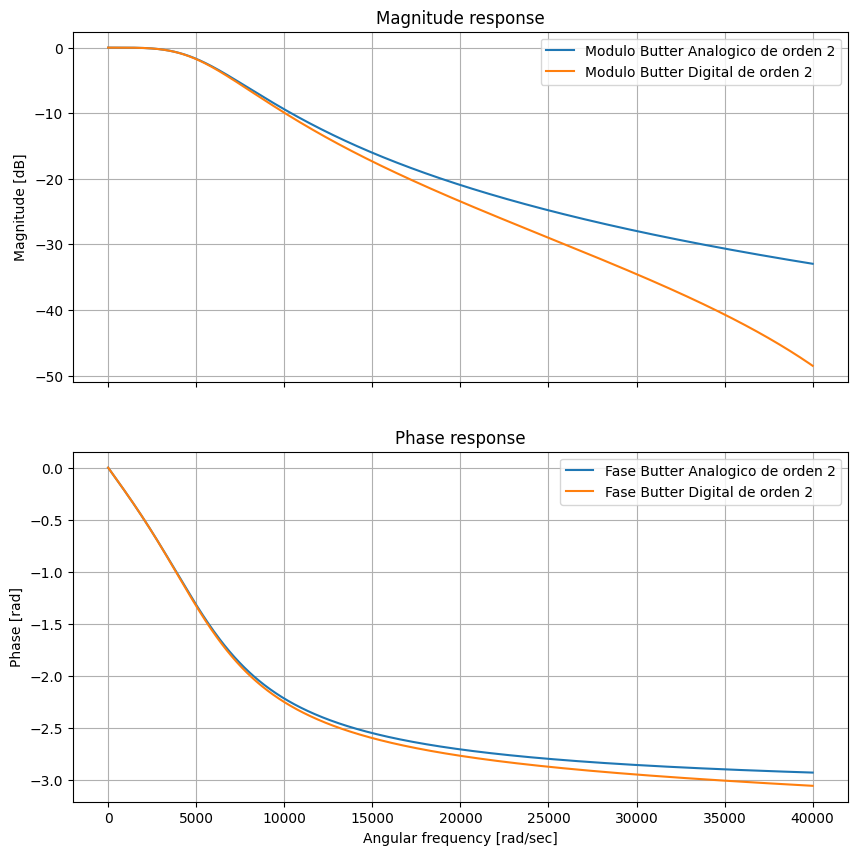

In [35]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2

plt.close("all")

# Genero el filtro Butter analogico

n_orden = 2
fc = 6000
norma_fc = 1
fc_norm = fc/norma_fc

w0 = 2*np.pi*fc_norm

fs = 100e3

ripple = 3
eps = np.sqrt(10**(ripple/10)-1)

#z,p,k = sig.buttap(n_orden)
# Desnormalizamos para cumplir con el ripple
#z, p, k = sig.lp2lp_zpk(z, p, k, wo=w0*eps**(-1/n_orden) )
#num_butt, den_butt = sig.zpk2tf(z,p,k)

#Z,P,K = sig.buttap(2)
#Num,Den = sig.zpk2tf(Z,P,K)
#num_butt,den_butt = sig.lp2lp(Num,Den, w0*eps**(-1/n_orden))

num_butt, den_butt = sig.butter(2, fc_norm, btype="low", analog=True)

tf_analog_butter = sig.TransferFunction(num_butt, den_butt)
tc2.pretty_print_lti(num_butt, den_butt)

#### Butter Digital

# Parametros

k = 2*fs
Q = 1/np.sqrt(2)

# Filtro (Esto hayado en el PDF)

#num_tz, den_tz = sig.bilinear(num_butt, den_butt, fs = 1.0)

num_tz = [w0**2, 2 * w0**2, w0**2]
den_tz = [k**2+(k*w0/Q)+w0**2, (2*w0**2)-(2*k**2), k**2-(k*w0/Q)+w0**2]

tf_digital_butter = sig.TransferFunction(num_tz, den_tz)

tc2.pretty_print_lti(num_tz, den_tz)

########################################################################

freq = np.linspace(0, 40e3, 1000)

w_an, h_an = sig.freqs(num_butt, den_butt, worN = freq)
mod_an = np.abs(h_an)
phase_an = np.angle(h_an)

w_dig, h_dig = sig.freqz(num_tz, den_tz, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

fig_bode = plt.figure(1)

ax_mod, ax_phase = fig_bode.subplots(2, 1, sharex=True)
fig_bode.sca(ax_mod)
ax_mod.plot(w_an, 20*np.log10(mod_an), label='Modulo Butter Analogico de orden 2')
ax_mod.plot(w_dig, 20*np.log10(mod_dig), label='Modulo Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.title('Magnitude response')

fig_bode.sca(ax_phase)
ax_phase.plot(w_an, phase_an, label='Fase Butter Analogico de orden 2')
ax_phase.plot(w_dig, phase_dig, label='Fase Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase [rad]')
plt.title('Phase response')

plt.show()

### Codigo asociado al punto c) (Fc = 6KHz y Fs = 10KHz) 

<IPython.core.display.Math object>

<IPython.core.display.Math object>

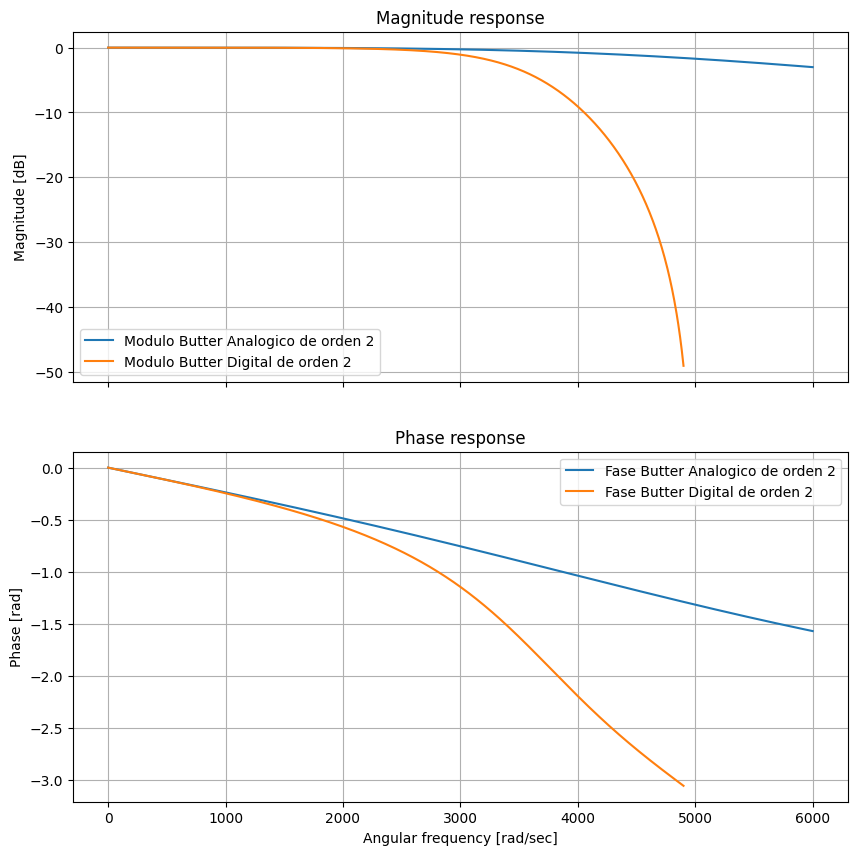

In [36]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2

plt.close("all")

# Genero el filtro Butter analogico

n_orden = 2
fc = 6000
norma_fc = 1
fc_norm = fc/norma_fc

w0 = 2*np.pi*fc_norm

fs = 10e3

ripple = 3
eps = np.sqrt(10**(ripple/10)-1)

#z,p,k = sig.buttap(n_orden)
# Desnormalizamos para cumplir con el ripple
#z, p, k = sig.lp2lp_zpk(z, p, k, wo=w0*eps**(-1/n_orden) )
#num_butt, den_butt = sig.zpk2tf(z,p,k)

#Z,P,K = sig.buttap(2)
#Num,Den = sig.zpk2tf(Z,P,K)
#num_butt,den_butt = sig.lp2lp(Num,Den, w0*eps**(-1/n_orden))

num_butt, den_butt = sig.butter(2, fc_norm, btype="low", analog=True)

tf_analog_butter = sig.TransferFunction(num_butt, den_butt)
tc2.pretty_print_lti(num_butt, den_butt)

#### Butter Digital

# Parametros

k = 2*fs
Q = 1/np.sqrt(2)

# Filtro (Esto hayado en el PDF)

#num_tz, den_tz = sig.bilinear(num_butt, den_butt, fs = 1.0)

num_tz = [w0**2, 2 * w0**2, w0**2]
den_tz = [k**2+(k*w0/Q)+w0**2, (2*w0**2)-(2*k**2), k**2-(k*w0/Q)+w0**2]

tf_digital_butter = sig.TransferFunction(num_tz, den_tz)

tc2.pretty_print_lti(num_tz, den_tz)

########################################################################

freq = np.linspace(0, 6e3, 1000)

w_an, h_an = sig.freqs(num_butt, den_butt, worN = freq)
mod_an = np.abs(h_an)
phase_an = np.angle(h_an)

freq = np.linspace(0, 4.9e3, 1000)

w_dig, h_dig = sig.freqz(num_tz, den_tz, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

fig_bode = plt.figure(1)

ax_mod, ax_phase = fig_bode.subplots(2, 1, sharex=True)
fig_bode.sca(ax_mod)
ax_mod.plot(w_an, 20*np.log10(mod_an), label='Modulo Butter Analogico de orden 2')
ax_mod.plot(w_dig, 20*np.log10(mod_dig), label='Modulo Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.title('Magnitude response')

fig_bode.sca(ax_phase)
ax_phase.plot(w_an, phase_an, label='Fase Butter Analogico de orden 2')
ax_phase.plot(w_dig, phase_dig, label='Fase Butter Digital de orden 2')

plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad/sec]')
plt.ylabel('Phase [rad]')
plt.title('Phase response')

plt.show()

$Casos$ como el $a$ y $b$, se ve como masomenos el $filtro$ $digital$ se asemeja al comportamiento del $Butter$ $Analogico$, cortando en $3db$ aproximadamente en la $frecuencia$ $de$ $corte$.

$Casos$ como el $c$, se ve como la $diferencia$ entre los $filtros$ empieza a aumentar.

### Punto d) 

### Codigo del ejercicio 3 (Diagrama en bloques) para verficar el modulo y fase

<IPython.core.display.Math object>

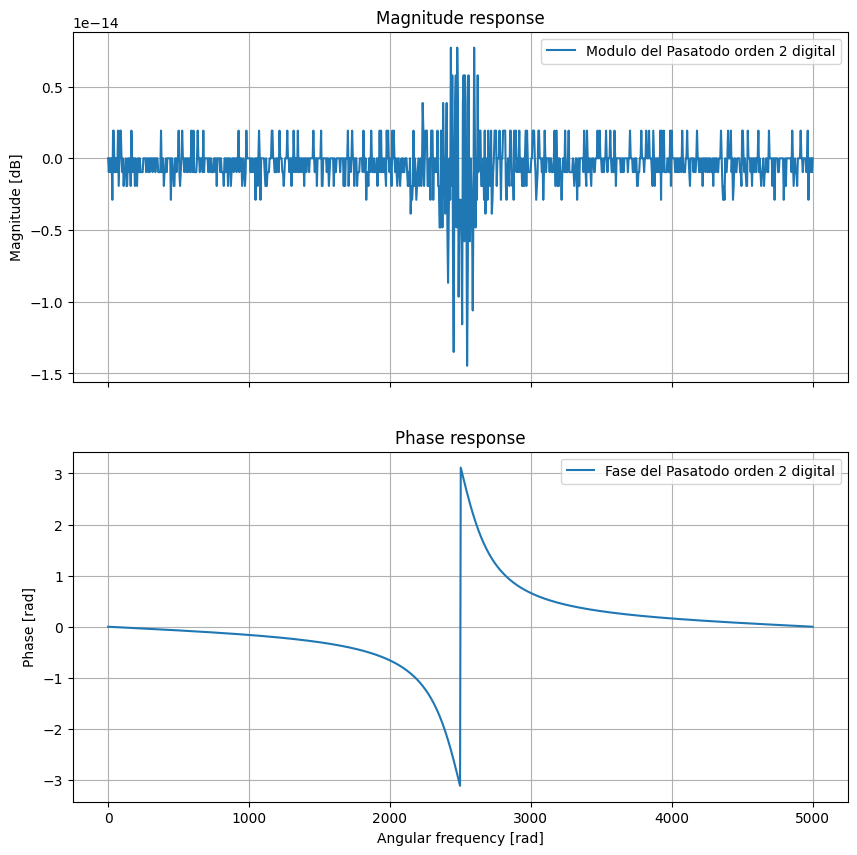

In [42]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import pytc2.sistemas_lineales as tc2

from pytc2.sistemas_lineales import pzmap, GroupDelay, bodePlot, analyze_sys

plt.close("all")

# Genero el filtro Butter analogico

n_orden = 2
fs = 10000

#### Butter Digital

# Parametros

k = 2*fs

# Filtro (Esto hayado en el PDF)

num_tz = [0.8, 0, 1]
den_tz = [1, 0, 0.8]

tf_digital_butter = sig.TransferFunction(num_tz, den_tz)

tc2.pretty_print_lti(num_tz, den_tz)

########################################################################

freq = np.linspace(0, 5000, 1000)

w_dig, h_dig = sig.freqz(num_tz, den_tz, worN = freq, fs = fs)
mod_dig = np.abs(h_dig)
phase_dig = np.angle(h_dig)

########################################################################

fig_bode = plt.figure(1)

ax_mod, ax_phase = fig_bode.subplots(2, 1, sharex=True)
fig_bode.sca(ax_mod)
ax_mod.plot(w_dig, 20*np.log10(mod_dig), label='Modulo del Pasatodo orden 2 digital')

plt.legend()
plt.grid()
plt.ylabel('Magnitude [dB]')
plt.title('Magnitude response')

fig_bode.sca(ax_phase)
ax_phase.plot(w_dig, phase_dig, label='Fase del Pasatodo orden 2 digital')

plt.legend()
plt.grid()
plt.xlabel('Angular frequency [rad]')
plt.ylabel('Phase [rad]')
plt.title('Phase response')

plt.show()

A pesar del $ruido$, se puede ver que el modulo es de $0$ $dB$ verificando el $Pasa-Todo$, ademas de los hayado en el pdf.